https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.paul15.html

In [6]:
import scanpy as sc
from sklearn_ann.kneighbors.annoy import AnnoyTransformer

In [7]:
sc.logging.print_header()

/home/omen/miniconda3/envs/env_py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==2.1.3 scipy==1.15.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 pynndescent==0.5.13


Object `paul15` not found.


In [8]:
adata_default = sc.datasets.paul15()
sc.pp.pca(adata_default)
adata_annoy, adata_pynnd = adata_default.copy(), adata_default.copy()

100%|██████████| 9.82M/9.82M [00:04<00:00, 2.36MB/s]


In [9]:
%timeit sc.pp.neighbors(adata_default, n_neighbors=15)
%timeit sc.pp.neighbors(adata_pynnd, transformer="pynndescent", n_neighbors=15)
%timeit sc.pp.neighbors(adata_annoy, transformer=AnnoyTransformer(15))

132 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
715 ms ± 8.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/omen/miniconda3/envs/env_py312/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/omen/miniconda3/envs/env_py312/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/omen/miniconda3/envs/env_py312/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/omen/mi

49.1 ms ± 597 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
for adata in [adata_default, adata_annoy, adata_pynnd]:
    sc.tl.leiden(adata, flavor="igraph")
    sc.tl.umap(adata)

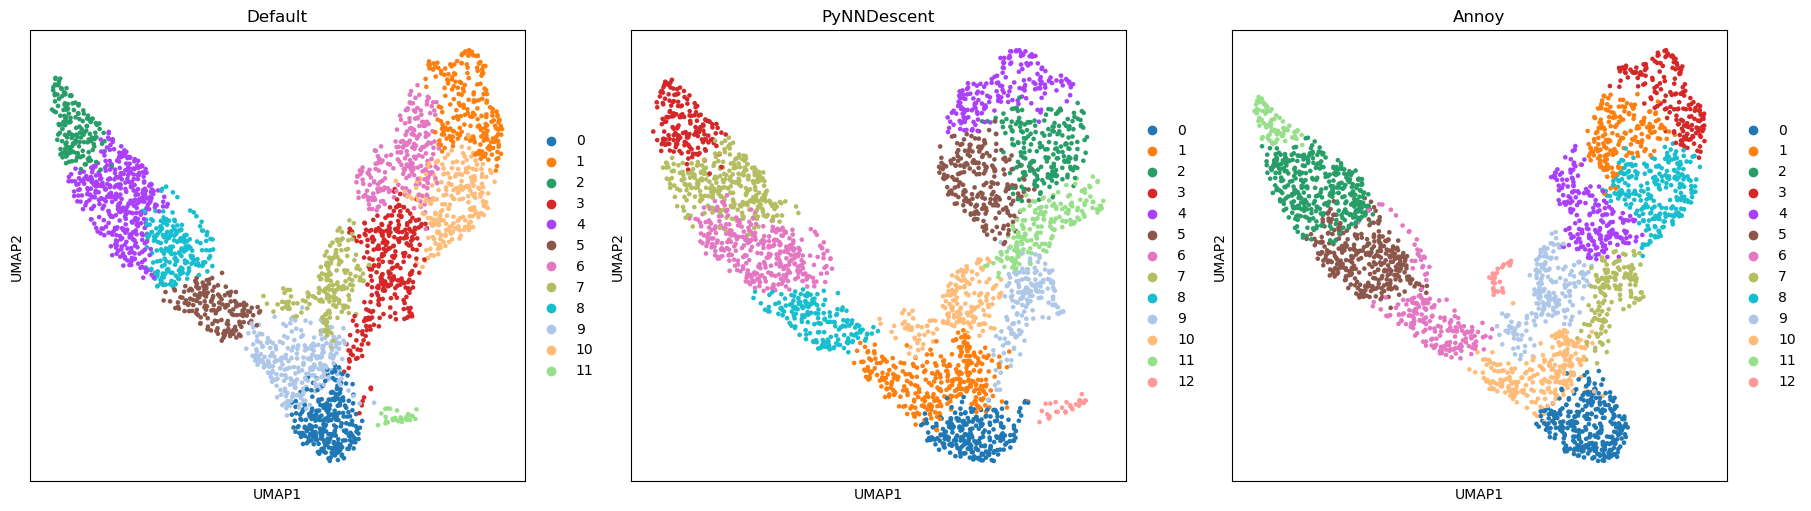

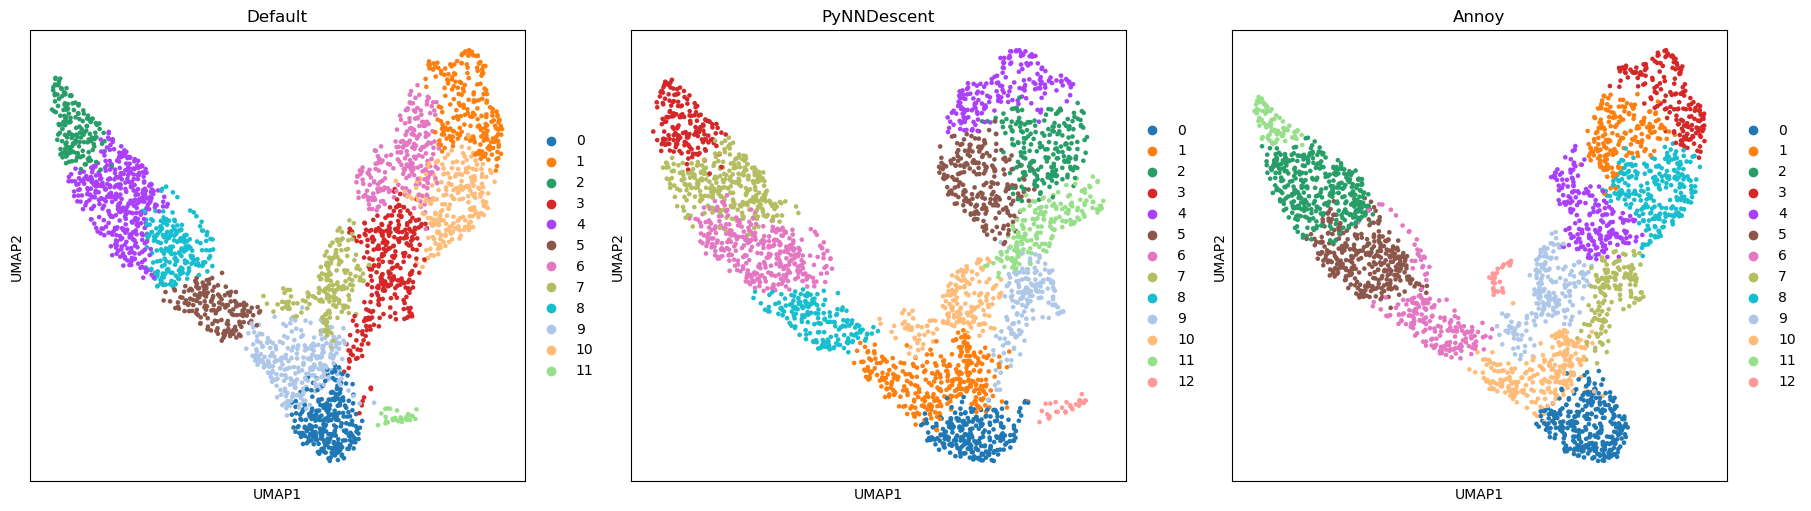

In [12]:
import matplotlib.pyplot as plt

with plt.ioff():
    fig, axs = plt.subplots(1, 3, figsize=(18, 5), layout="constrained")
sc.pl.umap(adata_default, color="leiden", ax=axs[0], show=False, title="Default")
sc.pl.umap(adata_pynnd, color="leiden", ax=axs[1], show=False, title="PyNNDescent")
sc.pl.umap(adata_annoy, color="leiden", ax=axs[2], show=False, title="Annoy")
fig